In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats        
import statistics

In [6]:
data = pd.read_csv('../Preprocess/Preprocessed_data.csv')


# Hypothesis for fuel of car

In [10]:
data.fuel.unique()

array(['Xăng', 'Dầu', 'Động cơ Hybrid', 'Unknown'], dtype=object)

In [13]:
fuel_Gas = data[data['fuel']=='Xăng']
fuel_Oil = data[data['fuel']=='Dầu']
fuel_Hybrid = data[data['fuel']=='Động cơ Hybrid']

<AxesSubplot:>

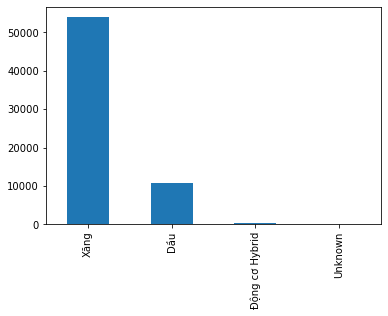

In [15]:
data.fuel.value_counts().plot(kind='bar')

In [18]:
price_gas = fuel_Gas['car_price']
price_oil = fuel_Oil['car_price']
price_hybrid = fuel_Hybrid['car_price']

In [67]:
### Nếu pValue < 0.05 ==> phản bác null hypothesis ###
gas_dist = stats.shapiro(price_gas)
oil_dist = stats.shapiro(price_oil)
hybrid_dist = stats.shapiro(price_hybrid)
print('pvalue for gas distribution: ', gas_dist[1])
print('pvalue for oil distribution: ', oil_dist[1])
print('pvalue for hybrid distribution: ', hybrid_dist[1])

pvalue for gas distribution:  0.0
pvalue for oil distribution:  0.0
pvalue for hybrid distribution:  6.115786742280718e-18


Distribution of Gas and Oil is not normal

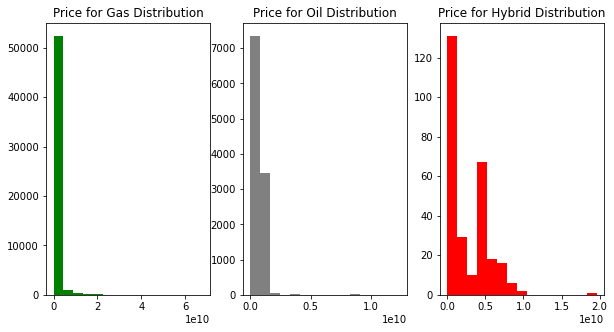

Here we clearly see that both the variables do not follow a normal distribution


In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

ax[0].hist(x=price_gas, bins=15, color = 'g')
ax[0].title.set_text('Price for Gas Distribution')

ax[1].hist(x=price_oil, bins=15, color = 'grey')
ax[1].title.set_text('Price for Oil Distribution')

ax[2].hist(x=price_hybrid, bins=15, color = 'red')
ax[2].title.set_text('Price for Hybrid Distribution')

plt.show()

print('Here we clearly see that both the variables do not follow a normal distribution')

In [63]:
def comparePrice(itemA,itemB):
    priceA,nameA = itemA
    priceB,nameB = itemB
    different = stats.mannwhitneyu(priceA, priceB  , alternative='two-sided')
    bowl_lt_cup = stats.mannwhitneyu(priceA, priceB , alternative='less')
    bowl_gt_cup = stats.mannwhitneyu(priceA, priceB , alternative='greater')

    print(different[1])
    print(bowl_lt_cup[1])
    print(bowl_gt_cup[1])

    if different[1] < 0.05:
        print(f'Price are statistically not equal for {nameA} and {nameB} at confidence level 0.05')

    if bowl_lt_cup[1] < 0.05:
        print(f'{nameA} statistically has less price than {nameB} at confidence level 0.05')

    if bowl_gt_cup[1] < 0.05:
        print(f'{nameA} statistically has more price than {nameB} at confidence level 0.05')

In [64]:
listFuel = [[price_oil,'Oil'],[price_gas,'Gas'],[price_hybrid,'Hybrid']]
comparePrice(listFuel[0],listFuel[1])

1.7205011067516242e-173
1.0
8.602505533758121e-174
Price are statistically not equal for Oil and Gas at confidence level 0.05
Oil statistically has more price than Gas at confidence level 0.05


In [65]:
comparePrice(listFuel[0],listFuel[2])

3.5240286151051454e-84
1.7620143075525727e-84
1.0
Price are statistically not equal for Oil and Hybrid at confidence level 0.05
Oil statistically has less price than Hybrid at confidence level 0.05


In [66]:
comparePrice(listFuel[1],listFuel[2])

5.965052574009576e-90
2.982526287004788e-90
1.0
Price are statistically not equal for Gas and Hybrid at confidence level 0.05
Gas statistically has less price than Hybrid at confidence level 0.05


# Hypothesis for gear of car

In [36]:
data.gear.unique()

array(['Tự động', 'Bán tự động', 'Số sàn', 'Unknown'], dtype=object)

In [38]:
gear_auto = data[data['gear']=='Tự động']
gear_semi_auto = data[data['gear']=='Bán tự động']
gear_floor = data[data['gear']=='Số sàn']

gear_auto_price = gear_auto['car_price']
gear_sAuto_price = gear_semi_auto['car_price']
gear_floor_price = gear_floor['car_price']

In [39]:
auto_dist = stats.shapiro(gear_auto_price)
sAuto_dist = stats.shapiro(gear_sAuto_price)
floor_dist = stats.shapiro(gear_floor_price)
print('pvalue for gear auto distribution: ', auto_dist[1])
print('pvalue for semi auto distribution: ', sAuto_dist[1])
print('pvalue for transmission car car distribution: ', floor_dist[1])

pvalue for gear auto distribution:  0.0
pvalue for semi auto distribution:  2.654692927917373e-28
pvalue for transmission car car distribution:  0.0


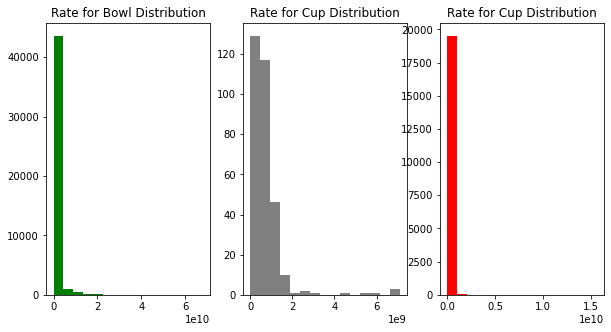

Here we clearly see that both the variables do not follow a normal distribution


In [40]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

ax[0].hist(x=gear_auto_price, bins=15, color = 'g')
ax[0].title.set_text('Price for Bowl Distribution')

ax[1].hist(x=gear_sAuto_price, bins=15, color = 'grey')
ax[1].title.set_text('Price for Cup Distribution')

ax[2].hist(x=gear_floor_price, bins=15, color = 'red')
ax[2].title.set_text('Price for Cup Distribution')

plt.show()

print('Here we clearly see that both the variables do not follow a normal distribution')

In [41]:
listGear = [[gear_auto_price,'Auto Gear'],[gear_sAuto_price,'Semi Auto'],[gear_floor_price,'Floor Gear']]
comparePrice(listGear[0],listGear[1])

3.203854502628671e-07
0.9999998398109425
1.6019272513143354e-07
Price are statistically not equal for Auto Gear and Semi Auto at confidence level 0.05
Auto Gear statistically has more price than Semi Auto at confidence level 0.05


In [42]:
comparePrice(listGear[0],listGear[2])

0.0
1.0
0.0
Price are statistically not equal for Auto Gear and Floor Gear at confidence level 0.05
Auto Gear statistically has more price than Floor Gear at confidence level 0.05


In [43]:
comparePrice(listGear[1],listGear[2])

1.4173996055967718e-69
1.0
7.086998027983859e-70
Price are statistically not equal for Semi Auto and Floor Gear at confidence level 0.05
Semi Auto statistically has more price than Floor Gear at confidence level 0.05


# Hypothesis for kind of city

In [70]:
data.region_name.value_counts()

Hà Nội            20206
Unknown           14360
Tp Hồ Chí Minh    13815
Bình Dương         1830
Hải Phòng          1271
                  ...  
Cà Mau               25
Yên Bái               8
Bắc Kạn               7
Cao Bằng              5
Lai Châu              2
Name: region_name, Length: 64, dtype: int64

In [71]:
bigCity = data[(data['region_name'] == 'Hà Nội') | (data['region_name'] == 'Tp Hồ Chí Minh')]

In [72]:
otherCity = data[(data['region_name'] !='Hà Nội') & (data['region_name'] !='Tp Hồ Chí Minh' )]

In [73]:
bigCity_Price = bigCity['car_price']
otherCity_Price = otherCity['car_price']

In [74]:
bigCity_dist = stats.shapiro(bigCity_Price)
otherCity_dist = stats.shapiro(otherCity_Price)
print('pvalue for Big City distribution: ', bigCity_dist[1])
print('pvalue for Other City distribution: ', otherCity_dist[1])

pvalue for Big City distribution:  0.0
pvalue for Other City distribution:  0.0


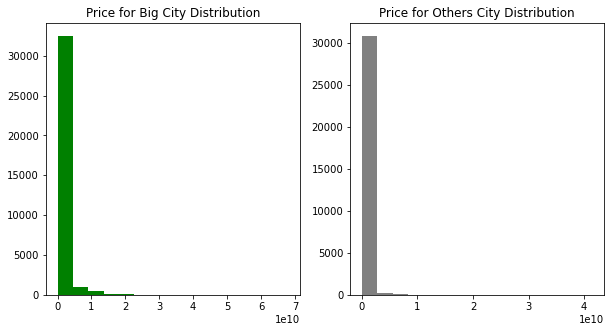

Here we clearly see that both the variables do not follow a normal distribution


In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].hist(x=bigCity_Price, bins=15, color = 'g')
ax[0].title.set_text('Price for Big City Distribution')

ax[1].hist(x=otherCity_Price, bins=15, color = 'grey')
ax[1].title.set_text('Price for Others City Distribution')
plt.show()

print('Here we clearly see that both the variables do not follow a normal distribution')

In [76]:
listCity = [[bigCity_Price,'Big city price'],[otherCity_Price,'Others city price']]
comparePrice(listCity[0],listCity[1])

0.0
1.0
0.0
Price are statistically not equal for Big city price and Others city price at confidence level 0.05
Big city price statistically has more price than Others city price at confidence level 0.05
